# Homework 2: U.S. Boundary Currents

Name: 

Date: 

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [2]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc4
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [3]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_east = xr.open_dataset('EVEL_2015_12.nc')
ds_north = xr.open_dataset('NVEL_2015_12.nc')

In [5]:
print(ds_east)

<xarray.Dataset> Size: 104MB
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
    longitude  (i) float64 6kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
    Z          (k) float32 200B ...
    timestep   (time) int64 8B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    EVEL       (time, k, j, i) float64 104MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_versio

In [6]:
print(ds_north)

<xarray.Dataset> Size: 104MB
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    Z          (k) float32 200B ...
    timestep   (time) int64 8B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    NVEL       (time, k, j, i) float64 104MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-0

In [4]:
# store the velocity components and longitude/latitude data
# into numpy arrays
evel = np.array(ds_east['EVEL'])
nvel = np.array(ds_north['NVEL'])
lon = np.array(ds_east['longitude'])
lat = np.array(ds_east['latitude'])

C:\Users\jon\AppData\Local\Temp\ipykernel_26900\2530506400.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  evel = np.array(ds_east['EVEL'])
C:\Users\jon\AppData\Local\Temp\ipykernel_26900\2530506400.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  nvel = np.array(ds_north['NVEL'])
C:\Users\jon\AppData\Local\Temp\ipykernel_26900\2530506400.py:5: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  lon = np.array(ds_east['longitude'])
C:\Users\jon\AppData\Local\Temp\ipykernel_26900\2530506400.py:6: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must im

In [7]:
print(evel)

[[[[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.01132422  0.01132422  0.01132422 ...  0.01132422  0.01132422
     0.01132422]
   [ 0.00981846  0.00981846  0.00981846 ...  0.00981846  0.00981846
     0.00981846]
   [ 0.01047253  0.01047253  0.01047253 ...  0.01047253  0.01047253
     0.01047253]]

  [[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.0032519   0.0032519   0.0032519  ...  0.0032519   0.0032519
     0.0032519 ]
   [ 0.00101832  0.00101832  0.00101832 ...  0.00101832  0.00101832
     0.00101832]
   [ 0.00125013  0.00125013  0.00125013 ...  0.00125013  0.00125013
     0.00125013]]

  [[ 0.    

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

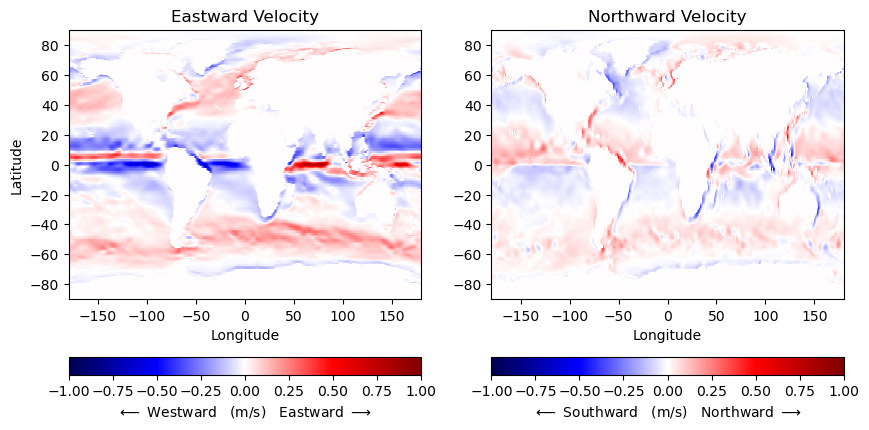

In [8]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,evel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$' )
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,nvel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$' )
plt.xlabel('Longitude')
plt.title('Northward Velocity');

### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

In [ ]:
1. The directions of the surface currents:
    - 30$^{\circ}$N
        - East coast of the U.S.: Eastward
        - West coast of the U.S.: No direction
2. The current that flows faster is the 

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [9]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_theta = xr.open_dataset('THETA_2015_12.nc')

In [11]:
print(ds_theta)

<xarray.Dataset> Size: 104MB
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    Z          (k) float32 200B ...
    timestep   (time) int64 8B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    THETA      (time, k, j, i) float64 104MB ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:  

In [20]:
# store the THETA grid into a into numpy array
theta = np.array(ds_theta['THETA'])
lon = np.array(ds_theta['longitude'])
lat = np.array(ds_theta['latitude'])

C:\Users\jon\AppData\Local\Temp\ipykernel_26900\2099059990.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  theta = np.array(ds_theta['THETA'])
C:\Users\jon\AppData\Local\Temp\ipykernel_26900\2099059990.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  lon = np.array(ds_theta['longitude'])
C:\Users\jon\AppData\Local\Temp\ipykernel_26900\2099059990.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  lat = np.array(ds_theta['latitude'])
C:\Users\jon\AppData\Local\Temp\ipykernel_26900\2099059990.py:5: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ 

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

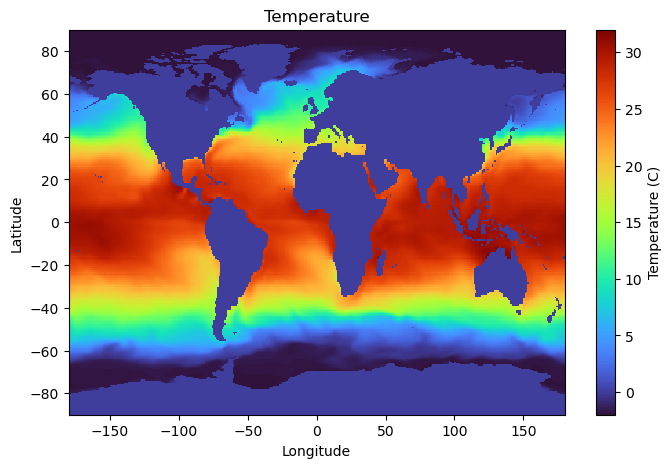

In [25]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

C = plt.pcolormesh(lon,lat,theta[0, 0, :, :], vmin = -2, vmax=32, cmap='turbo')
plt.colorbar(C, label='Temperature (C)' )
plt.title('Temperature')
plt.ylabel('Latitude')
plt.xlabel('Longitude');

### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

1. The temperature looks cooler on the West Coast with approximately 15 degrees Celsius while the East coast is higher with approximately 25 degrees Celsius
2. Because they carry water with different temperatures along the coasts, ocean currents have a substantial impact on the reported temperature regime. The Gulf Stream takes warm water northward along the East Coast, resulting in higher temperatures there, whereas the California Current delivers cold water southward along the West Coast, resulting in colder temperatures there.

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [85]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_west = xr.open_dataset('WVELSTAR_2015_12.nc')

In [86]:
# store the WVELSTAR grid into a into numpy array
wvel = np.array(ds_west['WVELSTAR'])
lon = np.array(ds_west['longitude'])
lat = np.array(ds_west['latitude'])

C:\Users\jon\AppData\Local\Temp\ipykernel_26900\3913837172.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  wvel = np.array(ds_west['WVELSTAR'])
C:\Users\jon\AppData\Local\Temp\ipykernel_26900\3913837172.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  lon = np.array(ds_west['longitude'])
C:\Users\jon\AppData\Local\Temp\ipykernel_26900\3913837172.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  lat = np.array(ds_west['latitude'])


In [45]:
print(ds_west)

<xarray.Dataset> Size: 104MB
Dimensions:    (i: 720, j: 360, k_l: 50, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * k_l        (k_l) int64 400B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
    longitude  (i) float64 6kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
    timestep   (time) int64 8B ...
    Zl         (k_l) float32 200B 0.0 -10.0 -20.0 ... -5.244e+03 -5.678e+03
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    WVELSTAR   (time, k_l, j, i) float64 104MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution: 

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [87]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
Zl = np.array(ds_west['Zl'])

C:\Users\jon\AppData\Local\Temp\ipykernel_26900\3778340128.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  Zl = np.array(ds_west['Zl'])


In [91]:
print(wvel)

[[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   ...
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   ...
   

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

Text(0, 0.5, 'Depth (m)')

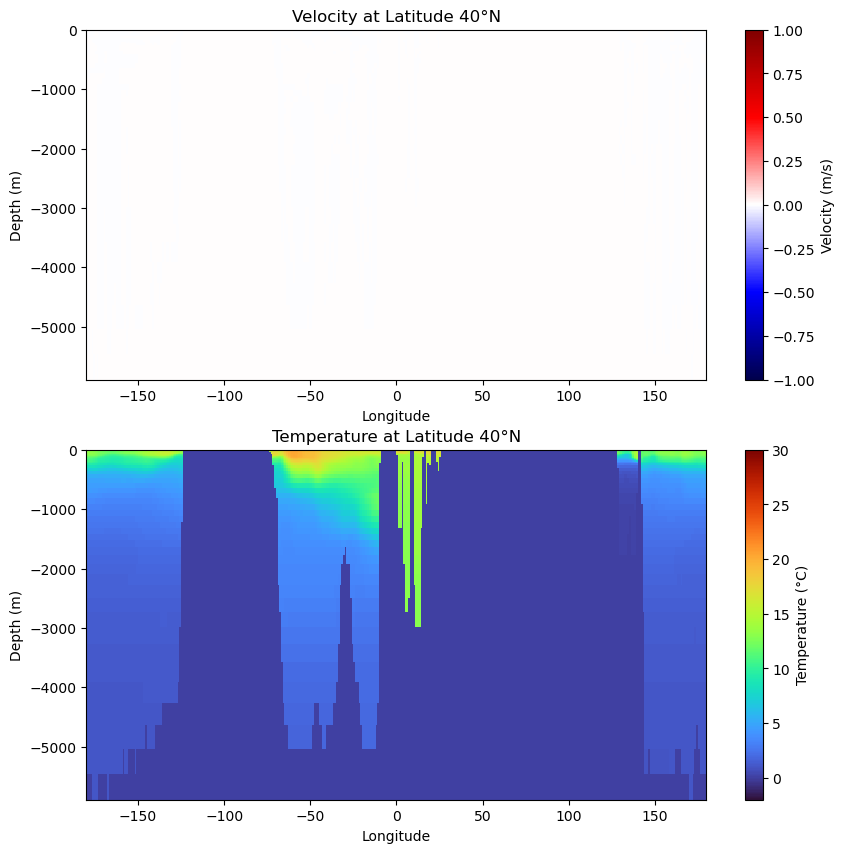

In [90]:
# make a figure
fig = plt.figure(figsize=(10,10))

# Index corresponding to latitude 40N
latitude_index = 259

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(2,1,1)
C = plt.pcolormesh(lon, Zl, wvel[0, :, latitude_index, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(label='Velocity (m/s)')
plt.title('Velocity at Latitude 40°N')
plt.xlabel('Longitude')
plt.ylabel('Depth (m)')

# # make a subplot of the vertical profile of temperature
plt.subplot(2,1,2)
C = plt.pcolormesh(lon, Z, theta[0, :, latitude_index, :], vmin = -2, vmax=30, cmap='turbo')
plt.colorbar(label='Temperature (°C)')
plt.title('Temperature at Latitude 40°N')
plt.xlabel('Longitude')
plt.ylabel('Depth (m)')


### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

1. The vertical velocity is stronger and more upwardly moving on the West Coast because of upwelling, whereas it is weaker and frequently downwardly moving on the East Coast because of downwelling. The divergent oceanic phenomena, such the Gulf Stream and the California Current, are what cause this discrepancy.
2. Since horizontal velocity is influenced by massive forces like wind stress and Coriolis effects, which produce stronger and longer-lasting currents, vertical movement is typically much slower than horizontal velocity. This is because vertical movement is primarily driven by buoyancy forces, pressure gradients, and wind-induced upwelling or downwelling.
3. While downwelling on the East Coast tends to prevent cooler water from rising, resulting in warmer surface temperatures, vertical currents, such as upwelling on the West Coast, bring colder, nutrient-rich water to the top.
4. The prevailing southward winds in spring along the West Coast contributes to upwelling by pushing surface waters offshore, allowing colder, deeper water to rise, thus enhancing the upward vertical velocity identified on the West Coast.
